**I am using Python 3.9.7**

In [163]:
%pip install seaborn scipy pandas numpy matplotlib sklearn



You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [164]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import t
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from IPython.display import display
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.linear_model import Lasso, Ridge

## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


First few elements of the data: [2.22738598 9.61436022 3.85863759 2.2654472  2.16899326]
Shape of the data: (1, 10000)
Estimated Mean: 5.027152443622421
Estimated Variance: 9.028667318774586


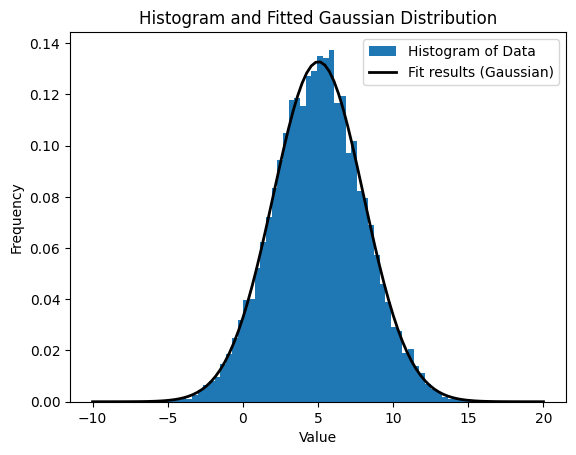

In [165]:
def question1_1():
    data = np.load('clean_data.npy')
    print("First few elements of the data:", data[0][:5])
    print("Shape of the data:", data.shape)

    meanEstimate, standardDeviationEstimate = norm.fit(data[0])

    varianceEstimate = standardDeviationEstimate**2

    print("Estimated Mean:", meanEstimate)
    print("Estimated Variance:", varianceEstimate)

    
    plt.hist(data[0], bins='auto', density=True, label='Histogram of Data')

    xmin, xmax = -10, 20
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, meanEstimate, standardDeviationEstimate)
    plt.plot(x, p, 'k', linewidth=2, label='Fit results (Gaussian)')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram and Fitted Gaussian Distribution')
    plt.legend()

    plt.show()


question1_1()

1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

First few elements of the data: [[2.22738598]
 [9.61436022]
 [3.85863759]
 [2.2654472 ]
 [2.16899326]]
Shape of the data: (11000, 1)
Estimated Mean: 6.614508398212064
Estimated Variance: 33.61185712302579


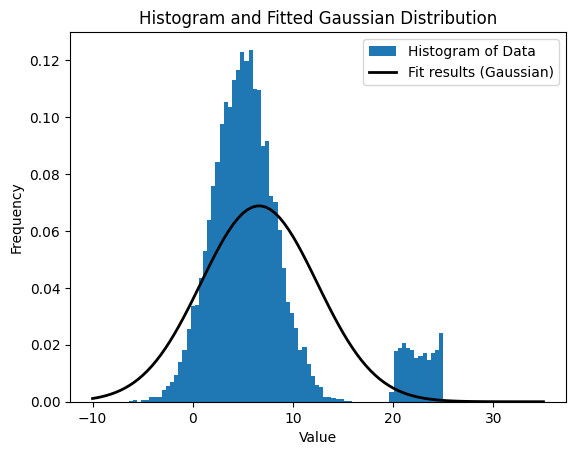

In [166]:

def question1_2():
    data = np.load('corrupted_data.npy')
    print("First few elements of the data:", data[:5])
    print("Shape of the data:", data.shape)

    meanEstimate, standardDeviationEstimate = norm.fit(data)

    varianceEstimate = standardDeviationEstimate**2

    print("Estimated Mean:", meanEstimate)
    print("Estimated Variance:", varianceEstimate)

    
    plt.hist(data, bins='auto', density=True, label='Histogram of Data')

    xmin, xmax = -10, 35
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, meanEstimate, standardDeviationEstimate)
    plt.plot(x, p, 'k', linewidth=2, label='Fit results (Gaussian)')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram and Fitted Gaussian Distribution')
    plt.legend()

    plt.show()

question1_2()

**The mean of the 'corrupted' is slightly larger than the clean data, as the outlier data seems to 
be concentrated at higher values (around 23), skewing the mean. The variance of the 'corrupted' data is also much larger 
than the clean data, as the corrupted data is more spread out than the clean data due to the outliers at higher values.**

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

Estimated Mean (Clean Data): 5.027152443622421
Estimated Variance (Clean Data): 9.028667318774586
Estimated Degrees of Freedom (t): 1.8562102776060034
Estimated Location (t): 5.19913884945735
Estimated Scale (t): 2.647356804210874


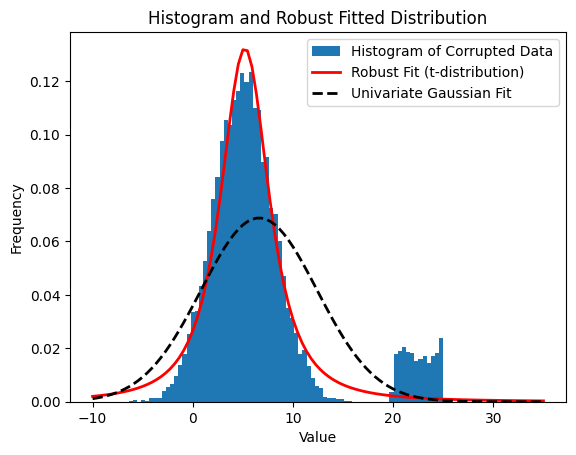


Comparison of Mean and Variance:
Clean Data (Exercise 1.1) - Mean: 5.027152443622421  Variance: 9.028667318774586
Corrupted Data (Exercise 1.2) - Mean: 6.614508398212064  Variance: 33.61185712302579
Robust Fit (t-distribution) - Mean: 5.19913884945735  Variance: 7.008498048801613


In [167]:
def question1_3():
    dataCorrupted = np.load('corrupted_data.npy')
    dataClean = np.load('clean_data.npy')

    meanEstimateClean, standardDeviationEstimateClean = norm.fit(dataClean[0])
    varianceEstimateClean = standardDeviationEstimateClean**2

    print("Estimated Mean (Clean Data):", meanEstimateClean)
    print("Estimated Variance (Clean Data):", varianceEstimateClean)

    degreesOfFreedomEstimate, locEstimate, scaleEstimate = t.fit(dataCorrupted)
    varianceRobust = scaleEstimate**2

    print("Estimated Degrees of Freedom (t):", degreesOfFreedomEstimate)
    print("Estimated Location (t):", locEstimate)
    print("Estimated Scale (t):", scaleEstimate)

    plt.hist(dataCorrupted, bins='auto', density=True, label='Histogram of Corrupted Data')

    xmin, xmax = -10, 35
    x = np.linspace(xmin, xmax, 100)
    
    p_t = t.pdf(x, degreesOfFreedomEstimate, locEstimate, scaleEstimate)
    
    plt.plot(x, p_t, 'r', linewidth=2, label='Robust Fit (t-distribution)')

    # Plot the Gaussian fit from Exercise 1.2 for comparison
    meanGaussianCorrupted, standardDeviationGaussianCorrupted = norm.fit(dataCorrupted)
    varianceGaussianCorrupted = standardDeviationGaussianCorrupted**2
    pGaussian = norm.pdf(x, meanGaussianCorrupted, standardDeviationGaussianCorrupted)
    plt.plot(x, pGaussian, 'k--', linewidth=2, label='Univariate Gaussian Fit')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram and Robust Fitted Distribution')
    plt.legend()

    plt.show()

    # Compare mean and variance estimated using robust fit with those from Exercise 1.1 and 1.2
    print("\nComparison of Mean and Variance:")
    print("Clean Data (Exercise 1.1) - Mean:", meanEstimateClean, " Variance:", varianceEstimateClean)
    print("Corrupted Data (Exercise 1.2) - Mean:", meanGaussianCorrupted, " Variance:", varianceGaussianCorrupted)
    print("Robust Fit (t-distribution) - Mean:", locEstimate, " Variance:", varianceRobust)


question1_3()

**The robustness of the t-distribution comes from its heavier tails compared to the gaussian distribution. Tt assigns more probability mass to extreme values, making it less likely to be influenced by outliers.**

**In my case, the estimated mean of the t-distribution is closer to the mean of the clean data than the mean of the corrupted data. Similarly, the estimated variance of the t-distribution is closer to the variance of the clean data than the variance of the corrupted data, indicating that the t-distribution is more robust to outliers.**

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size (N×3)

 that has been reshaped into a vector of size (N∗3×1)

. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the "explained variance" (not singular values) associated with each of the eigenvectors.

**(5 marks)**

In [168]:
import numpy as np
from sklearn.decomposition import PCA

shape_array = np.load("shape_array.npy")

pca = PCA()

pca.fit(shape_array)

principal_components = pca.components_

transformed_data = pca.transform(shape_array)

explained_variance = pca.explained_variance_

print("Principal components (eigenvectors):\n", principal_components)
print("Transformed data:\n", transformed_data)
print("Explained variance:\n", explained_variance)

Principal components (eigenvectors):
 [[-0.38037258 -0.3752306  -0.3771993  -0.37817138 -0.37574705 -0.38059315
  -0.37840298]
 [-0.10408932  0.57824564  0.42631027  0.04255018 -0.58818233  0.001755
  -0.35395628]
 [ 0.16878511  0.5200732  -0.31816134 -0.7066488   0.25168675  0.17260851
  -0.08553907]
 [-0.19174041  0.06954237 -0.27825105  0.41819176  0.34790292  0.3272178
  -0.69136363]
 [ 0.193466    0.24013224 -0.70068115  0.36210376 -0.44749373  0.06895237
   0.27897954]
 [ 0.8508175  -0.29065686  0.05269513 -0.04612294 -0.16009548 -0.01326394
  -0.40114588]
 [ 0.13382919  0.32768434 -0.05999404  0.21838734  0.32029995 -0.8446006
  -0.08647621]]
Transformed data:
 [[-5.1101958e-03  3.4575682e-04  6.8627467e-04 ...  1.9255257e-03
  -5.7586329e-04 -9.8188757e-06]
 [ 2.0230766e-02  4.7289808e-03 -2.5007599e-03 ... -9.3818037e-04
  -7.2531402e-06  3.2279320e-04]
 [ 2.4545169e-03  2.9521307e-03  2.5158878e-03 ... -5.7056273e-04
  -1.4625583e-04 -2.5354256e-04]
 ...
 [-1.8145295e-03 -3.1

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the "explained variance" (not singular values) estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [169]:
# Load the data again just to be sure it's the same
shape_array = np.load("shape_array.npy")

cov_matrix = np.cov(shape_array, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

coordinates_cov = np.dot(shape_array, eigenvectors)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Coordinates in new space:\n", coordinates_cov)

Eigenvalues:
 [3.73037469e-04 3.70862164e-06 1.24675147e-06 3.26716550e-08
 9.81054237e-08 4.68177310e-07 3.71225469e-07]
Eigenvectors:
 [[ 0.38037267 -0.10408952 -0.16878517  0.13382929 -0.85081701  0.1917407
  -0.19346631]
 [ 0.37523072  0.57824549 -0.52007308  0.32768428  0.29065711 -0.06954207
  -0.24013207]
 [ 0.37719945  0.42631018  0.31816154 -0.05999385 -0.05269555  0.27825017
   0.70068124]
 [ 0.37817134  0.04255012  0.70664843  0.21838721  0.04612337 -0.41819136
  -0.36210435]
 [ 0.37574697 -0.58818238 -0.25168667  0.32029986  0.16009537 -0.34790342
   0.44749325]
 [ 0.38059307  0.00175498 -0.17260847 -0.8446007   0.01326375 -0.3272177
  -0.06895263]
 [ 0.37840279 -0.3539563   0.08553902 -0.08647633  0.40114613  0.69136388
  -0.2789784 ]]
Coordinates in new space:
 [[ 5.12260810e-03  3.48037802e-04 -6.85214800e-04 ...  5.74537025e-04
  -2.57142980e-04 -1.92618563e-03]
 [-2.02183523e-02  4.73126701e-03  2.50182091e-03 ...  5.91708552e-06
  -1.55442405e-03  9.37519766e-04]
 [-2

In [170]:
print("Eigenvalues:\n", eigenvalues)
print("Explained variance:\n", explained_variance)

Eigenvalues:
 [3.73037469e-04 3.70862164e-06 1.24675147e-06 3.26716550e-08
 9.81054237e-08 4.68177310e-07 3.71225469e-07]
Explained variance:
 [3.7303765e-04 3.7086184e-06 1.2467515e-06 4.6817738e-07 3.7122567e-07
 9.8105382e-08 3.2671682e-08]


**The eigenvalues and the explained variance are very close to each other, but not exactly the same. The differences are very small (on the order of 10^-8 or smaller), which suggests that they are likely due to the numerical precision of the calculations, which makes sense as they are calculating the same thing but with slightly different methods. Both the eigenvalues and the explained variance represent the amount of variance in the data that is captured by each principal component. The principal component associated with the largest eigenvalue (or explained variance) captures the most variance in the data, the next largest captures the second most, and so on. However, the values are ordered differently due to the methods that were used to calculate them.** 


2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

(615, 3)
(615, 3)


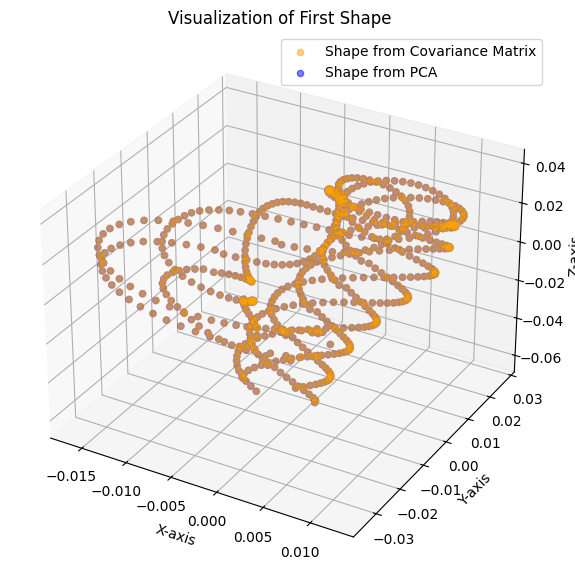

In [171]:
shape_index = 0

reconstructed_data_pca_T = transformed_data.T
reconstructed_data_eig_T =  coordinates_cov.T

first_shape_pca = reconstructed_data_pca_T[shape_index]
first_shape_eig = reconstructed_data_eig_T[shape_index]

first_shape_pca = first_shape_pca.reshape((-1, 3))
first_shape_eig = first_shape_eig.reshape((-1, 3))

# I invert PCA to get the original shape so it matches the same direction as the eigenvectors as its currently flipped
# Note that this is not necessary, but it makes the visualization easier to understand
# Also for some shapes the direction of the eigenvectors is the same as the original shape so this specific step is not necessary
first_shape_pca = -first_shape_pca

print(first_shape_pca.shape)
print(first_shape_eig.shape)

# Plot the first shape
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(first_shape_eig[:, 0], first_shape_eig[:, 1], first_shape_eig[:, 2], label='Shape from Covariance Matrix', marker='o', color='orange', alpha=0.5)
ax.scatter(first_shape_pca[:, 0], first_shape_pca[:, 1], first_shape_pca[:, 2], label='Shape from PCA', marker='o', color='blue', alpha=0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Visualization of First Shape')
ax.legend()
plt.show()



**Both methods are working as expected as the shapes are similar, if not identical for some points, because both methods are trying to capture the main variations in the data. This can be observed as the orange becomes darker (different shade) as blue dots are underneath them. To verify this, you can comment out one of the scatter plots and observe the change in colour.**

**PCA is often described as an approach for dimensionality reduction and data compression because it transforms the data to a new coordinate system where the principal components are ordered by the amount of variance they capture. By keeping only the first few principal components, you can capture most of the variance in the data with fewer dimensions. This is effectively compressing the data as you are representing the same data with fewer numbers, which can make subsequent analyses simpler and faster, and can help to avoid overfitting.**


# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

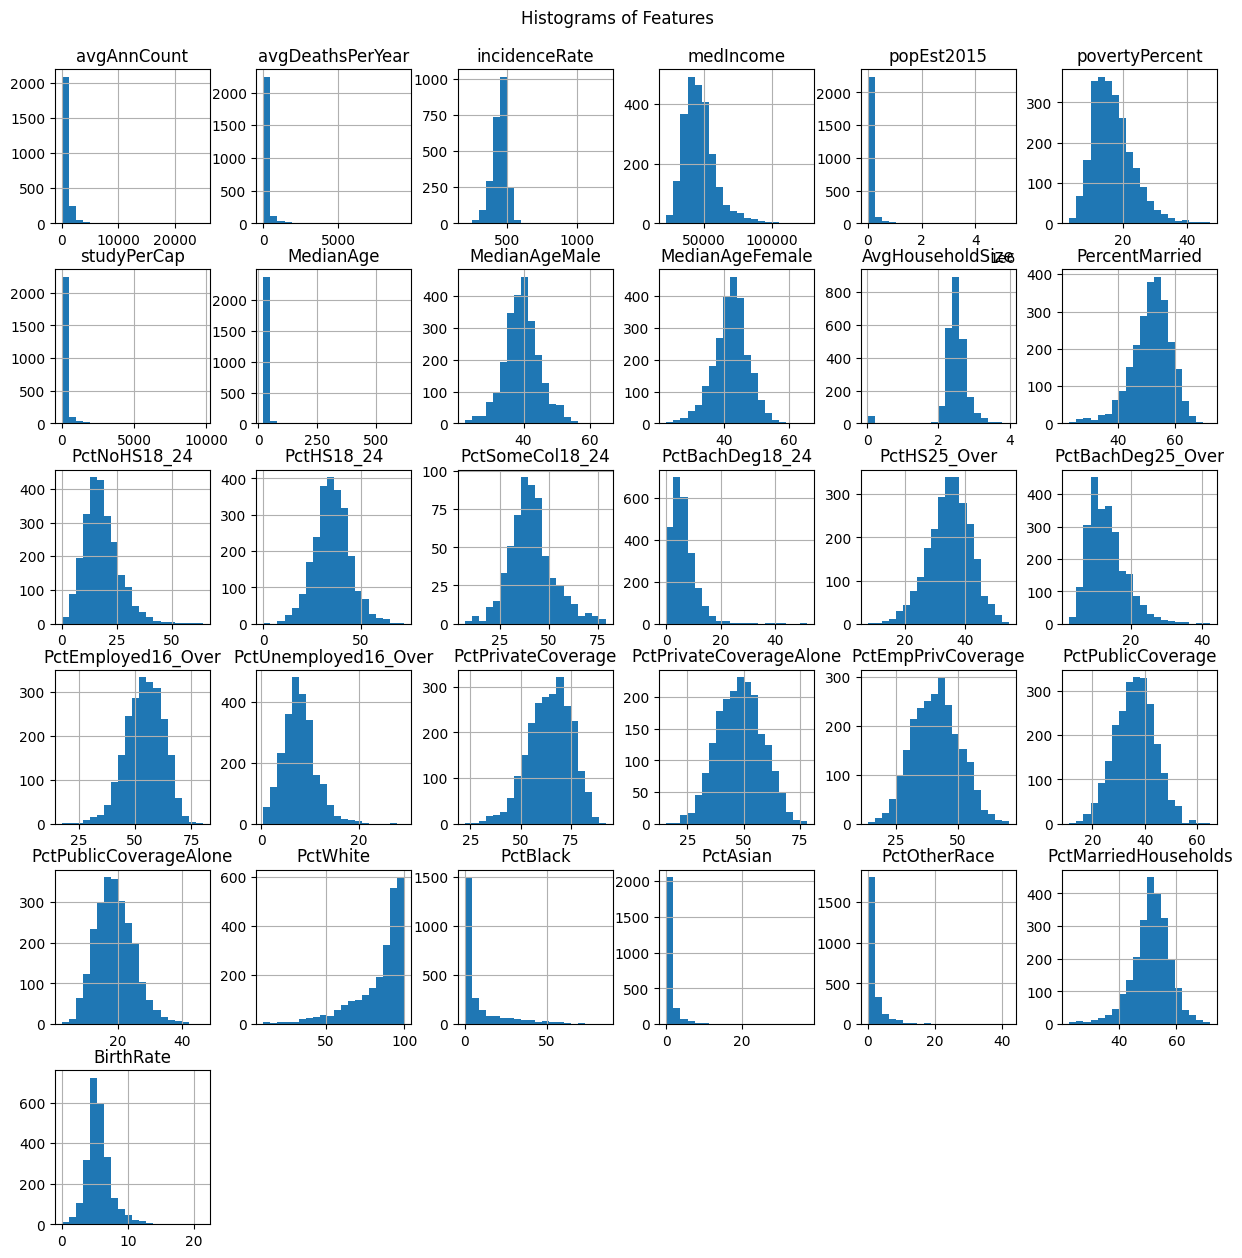

Top 5 features with strongest correlations:
PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
dtype: float64


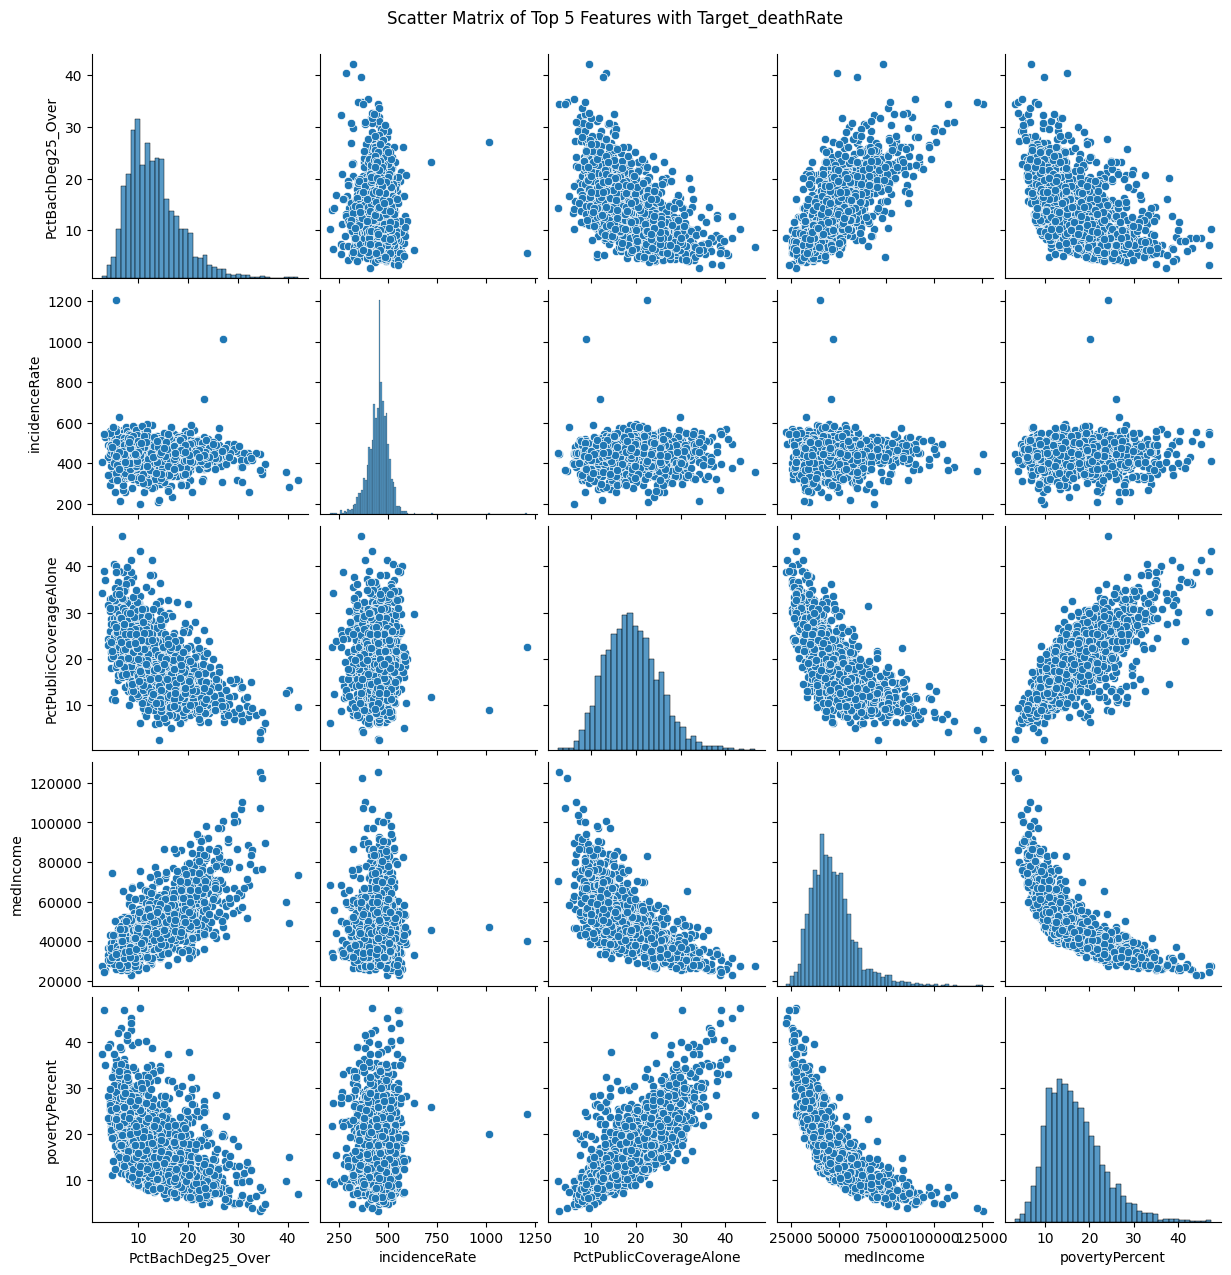

In [172]:
training_data = pd.read_csv('Training_data.csv')
targets = pd.read_csv('Training_data_targets.csv')

training_data.hist(figsize=(15, 15), bins=20)
plt.suptitle("Histograms of Features", y=0.92)
plt.show()

correlations = training_data.corrwith(targets['TARGET_deathRate'])

sorted_correlations = correlations.abs().sort_values(ascending=False)

top_features = sorted_correlations.head(5)
print("Top 5 features with strongest correlations:")
print(top_features)

sns.pairplot(training_data[top_features.index])
plt.suptitle("Scatter Matrix of Top 5 Features with Target_deathRate", y=1.02)
plt.show()



*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [173]:
display(training_data)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.000000,100,429.600000,80650,48904,7.5,0.000000,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,NaN,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,NaN,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,62.4,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,NaN,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965


In [174]:
# Check for missing values in all columns
missing_values = training_data.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values].index)

# Print number of missing values in each column
print("\nMissing values in each column:")
print(training_data.isnull().sum())

print("\nShape of training data:", training_data.shape)


Columns with missing values:
Index(['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone'], dtype='object')

Missing values in each column:
avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack       

I will let the imputer fill in the missing values with the median of the column
but there is a problem as there are errors/outliers in the median age features (MedianAge) with values >> 100. This is a problem as people who die at 100 years old would die of old age so its not fair to include them as died from cancer as it might skew the data.


In [175]:
training_data = pd.read_csv('Training_data.csv')
targets = pd.read_csv('Training_data_targets.csv')

full_data = pd.concat([training_data, targets], axis=1)

full_data["Age_Category"]=np.ceil(full_data["MedianAge"] / 5)
full_data["Age_Category"].where(full_data["Age_Category"] < 10, 10.0, inplace = True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train_index, test_index in split.split(full_data,full_data["Age_Category"]):
    strat_train_set = full_data.loc[train_index]
    strat_test_set = full_data.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop(("Age_Category"),axis=1,inplace=True)

print("Shape of training set:", strat_train_set.shape)
print("Shape of test set:", strat_test_set.shape)

Shape of training set: (1950, 32)
Shape of test set: (488, 32)


In [176]:
cancer=strat_train_set.drop("TARGET_deathRate",axis=1)
cancer_labels=strat_train_set["TARGET_deathRate"].copy()

display(cancer)
display(cancer_labels)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
2294,3000.0,1247,410.8,52109,405549,10.8,199.729256,54.0,52.2,55.5,...,41.1,30.9,43.9,17.2,91.176110,4.713574,1.463123,0.769313,49.339841,3.947723
1262,61.0,23,434.4,55465,11337,11.4,0.000000,40.8,35.9,44.8,...,58.4,52.8,30.7,15.9,92.723254,0.114943,0.309461,0.707339,55.213319,6.383909
1456,1366.0,561,412.7,43242,173115,11.9,17.329521,57.3,56.2,58.0,...,32.6,25.2,51.0,20.1,90.499026,5.606124,1.282399,0.573038,53.690715,4.954882
5,110.0,54,502.9,46927,14327,14.1,0.000000,44.5,43.4,45.4,...,47.4,42.5,42.4,23.1,98.174779,0.400996,0.373341,0.013827,54.140334,4.019074
1621,71.0,37,434.6,37336,13300,18.8,0.000000,38.6,38.2,39.3,...,NaN,32.9,42.4,26.7,67.665068,21.800074,0.022132,9.111029,47.256883,5.693717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,27.0,13,458.2,36027,3618,18.3,0.000000,48.5,46.4,50.0,...,44.2,31.0,32.9,13.3,93.109151,1.901874,0.000000,1.323043,48.636100,6.068602
1102,110.0,46,438.3,38966,16005,20.6,0.000000,48.2,46.8,49.8,...,NaN,33.4,45.6,22.3,94.941440,0.255420,0.679043,0.336407,51.564246,9.370529
2023,66.0,21,475.6,50924,11185,11.1,0.000000,40.8,40.3,41.4,...,57.6,50.4,32.7,15.6,92.254458,0.913850,2.537486,3.371484,56.808165,7.112971
1110,227.0,80,501.0,36810,35827,20.1,0.000000,40.6,38.7,42.7,...,44.9,39.7,39.3,22.9,68.099516,30.465791,0.093988,0.052522,49.698622,5.236240


2294    146.4
1262    159.0
1456    149.8
5       230.3
1621    220.6
        ...  
132     212.3
1102    169.5
2023    148.0
1110    174.3
1565    203.6
Name: TARGET_deathRate, Length: 1950, dtype: float64

In [177]:
num_attribs=list(cancer)
print(num_attribs)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [178]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator

imputer=SimpleImputer(strategy="median")

class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

from sklearn.preprocessing import OneHotEncoder

num_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

# Since the data doesn't have any categorical attributes, we don't need to use OneHotEncoder

training_data_prepared = num_pipeline.fit_transform(cancer)

training_data_prepared


array([[ 1.78571635,  2.23565054, -0.65261215, ..., -0.35836331,
        -0.3171427 , -0.83596439],
       [-0.41078958, -0.34811186, -0.23308256, ..., -0.37628513,
         0.58889589,  0.38834554],
       [ 0.56452183,  0.78756148, -0.61883647, ..., -0.41512216,
         0.35401998, -0.32981498],
       ...,
       [-0.40705275, -0.3523337 ,  0.49931655, ...,  0.39413343,
         0.83491563,  0.75473692],
       [-0.28672698, -0.22778959,  0.95084416, ..., -0.5656451 ,
        -0.26179732, -0.18841799],
       [-0.42050532, -0.34600095, -0.89081963, ..., -0.58083356,
         0.80066044, -1.04303235]])

In [179]:
cancer_test=strat_test_set.drop("TARGET_deathRate",axis=1)
cancer_label_test=strat_test_set["TARGET_deathRate"].copy()

display(cancer_test)

test_data_prepared = num_pipeline.fit_transform(cancer_test)

test_data_prepared

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
163,124.000000,54,393.500000,48944,24737,12.3,0.000000,43.0,42.2,43.9,...,52.3,46.5,31.9,13.1,96.713520,0.757179,0.394700,1.276733,56.925370,5.734426
2300,1246.000000,451,497.700000,55482,201169,11.2,159.070234,44.1,42.9,45.2,...,56.4,50.2,33.1,15.7,96.101802,0.684088,1.127793,0.173776,51.223106,5.050755
966,37.000000,18,425.400000,36642,6353,17.7,0.000000,40.9,39.9,43.6,...,NaN,43.0,35.0,17.9,93.842138,0.875307,0.629607,2.902334,47.850318,10.312273
2090,1962.667684,15,453.549422,51676,4823,12.4,1451.378810,44.9,45.3,44.7,...,53.8,40.3,34.3,14.1,95.953878,0.335430,0.461216,0.251572,57.395255,8.417508
1720,46.000000,16,417.400000,61730,10309,9.7,0.000000,41.1,41.1,41.1,...,56.8,43.7,27.9,12.3,82.501722,13.768330,2.204507,0.344454,60.105402,1.574468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,69.000000,32,481.700000,32042,9867,26.7,0.000000,44.4,43.1,46.0,...,38.3,31.4,43.4,25.2,53.197878,42.358122,0.740667,2.642378,41.562656,7.441634
1264,612.000000,246,490.400000,56326,110879,14.7,234.489849,37.3,36.1,38.5,...,53.8,48.8,35.0,19.8,80.259488,15.026599,1.112091,1.447144,47.871820,4.551301
532,1415.000000,558,483.800000,58697,229245,8.9,235.555846,43.2,41.6,44.7,...,61.9,56.8,28.7,13.6,92.552204,3.702106,1.268322,0.535659,50.142910,4.694264
859,49.000000,21,523.300000,30689,10343,27.9,0.000000,32.2,30.3,33.8,...,36.1,31.2,43.9,29.6,21.084280,75.536890,0.744488,1.603512,32.564553,6.144623


array([[-3.98804554e-01, -2.98405170e-01, -1.12979803e+00, ...,
        -1.81723723e-01,  9.01975533e-01, -8.88247340e-04],
       [ 6.53761856e-01,  7.50335401e-01,  9.78328442e-01, ...,
        -4.62308817e-01,  5.12055344e-02, -3.45336936e-01],
       [-4.80420666e-01, -3.93505070e-01, -4.84411904e-01, ...,
         2.31818853e-01, -4.52009685e-01,  2.30553513e+00],
       ...,
       [ 8.12303499e-01,  1.03299344e+00,  6.97110035e-01, ...,
        -3.70248166e-01, -1.09958195e-01, -5.24945086e-01],
       [-4.69163271e-01, -3.85580079e-01,  1.49625587e+00, ...,
        -9.85930815e-02, -2.73262497e+00,  2.05778733e-01],
       [-4.09123832e-01, -3.32746800e-01,  9.03471744e-01, ...,
        -4.14585998e-01, -8.26354778e-02,  5.10391212e-01]])

In [180]:
# I want to check for data leakage
# Get the indices of the training and test datasets
train_indices = set(strat_train_set.index)
test_indices = set(strat_test_set.index)

# Check if there's any overlap between the two sets of indices
overlap = train_indices & test_indices

if overlap:
    print(f"Data leakage detected: {len(overlap)} overlapping indices.")
else:
    print("No data leakage detected.")

No data leakage detected.


**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# How many folds to use for cross-validation
cross_validation_folds = 10

ols = LinearRegression()

ols.fit(training_data_prepared, cancer_labels)

train_preds = ols.predict(training_data_prepared)

train_mae = mean_absolute_error(cancer_labels, train_preds)
print(f'Training MAE: {train_mae}')

cv_scores = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_absolute_error')
print(f'Cross-validation MAE: {-cv_scores.mean()}')

test_preds = ols.predict(test_data_prepared)

test_mae = mean_absolute_error(cancer_label_test, test_preds)
print(f'Test MAE: {test_mae}')

# Fetch 3 entries from the test data
sample_data = test_data_prepared[:3]

sample_preds = ols.predict(sample_data)
print(f'Predictions for the first 3 entries: {sample_preds}')
print(f'Actual labels for the first 3 entries: {cancer_label_test[:3].values}')

Training MAE: 13.70956023231545


Cross-validation MAE: 13.99855849309892
Test MAE: 15.514953449519249
Predictions for the first 3 entries: [173.32088994 173.58132745 183.24375965]
Actual labels for the first 3 entries: [162.9 173.7 196.5]


In [182]:
# Calculate other metrics
train_rmse = mean_squared_error(cancer_labels, train_preds, squared=False)
test_rmse = mean_squared_error(cancer_label_test, test_preds, squared=False)
train_mse = mean_squared_error(cancer_labels, train_preds)
test_mse = mean_squared_error(cancer_label_test, test_preds)
train_mape = mean_absolute_percentage_error(cancer_labels, train_preds)
test_mape = mean_absolute_percentage_error(cancer_label_test, test_preds)

print(f'Training RMSE: {train_rmse}, MSE: {train_mse}, MAPE: {train_mape}')
cv_rmse = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_root_mean_squared_error')
cv_mse = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_absolute_percentage_error')


print(f'Cross-validation RMSE: {-cv_rmse.mean()}, MSE: {-cv_mse.mean()}, MAPE: {-cv_mape.mean()}')
print(f'Test RMSE: {test_rmse}, MSE: {test_mse}, MAPE: {test_mape}')


Training RMSE: 18.318229449451525, MSE: 335.55753016275315, MAPE: 0.07999574637625038


Cross-validation RMSE: 18.76098764111256, MSE: 352.71306591578224, MAPE: 0.08174314454133383
Test RMSE: 21.679564778341753, MSE: 470.00352897831635, MAPE: 0.08698446535528981


In [183]:
data = {
    'MAE': [train_mae, -cv_scores.mean(), test_mae],
    'RMSE': [train_rmse, -cv_rmse.mean(), test_rmse],
    'MSE': [train_mse, -cv_mse.mean(), test_mse],
    'MAPE': [train_mape, -cv_mape.mean(), test_mape]
}

ols_df = pd.DataFrame(data, index=['Training', 'Cross-validation', 'Test'])

# Calculate the difference between Cross-validation and Test data
ols_df.loc['|CV-Test Difference|'] = abs(ols_df.loc['Cross-validation'] - ols_df.loc['Test'])

# Save the test error for each metric to array
ols_test = ols_df.loc['Test'].values

display(ols_df)

,MAE,RMSE,MSE,MAPE
Training,13.709560,18.318229,335.557530,0.079996
Cross-validation,13.998558,18.760988,352.713066,0.081743
Test,15.514953,21.679565,470.003529,0.086984
|CV-Test Difference|,1.516395,2.918577,117.290463,0.005241


In [184]:
alphas = []
lower_limit = 0.0001
upper_limit = 100
print("Finding optimal alphas...")
print(f'Lower limit: {lower_limit}, Upper limit: {upper_limit}')
alphas = np.linspace(0.0001, 100, 1000)
print("Number of alphas tested:", len(alphas))

lasso_cv = LassoCV(alphas=alphas, cv=cross_validation_folds)
ridge_cv = RidgeCV(alphas=alphas, cv=cross_validation_folds)

lasso_cv.fit(training_data_prepared, cancer_labels)
ridge_cv.fit(training_data_prepared, cancer_labels)

lasso_preds = lasso_cv.predict(test_data_prepared)
ridge_preds = ridge_cv.predict(test_data_prepared)

lasso_mae = mean_absolute_error(cancer_label_test, lasso_preds)
ridge_mae = mean_absolute_error(cancer_label_test, ridge_preds)

# Print the best alphas and MAEs
print(f'Lasso: Best alpha = {lasso_cv.alpha_}, Test MAE = {lasso_mae}')
print(f'Ridge: Best alpha = {ridge_cv.alpha_}, Test MAE = {ridge_mae}')

Finding optimal alphas...
Lower limit: 0.0001, Upper limit: 100
Number of alphas tested: 1000
Lasso: Best alpha = 0.1002, Test MAE = 15.45916881163875
Ridge: Best alpha = 22.3224, Test MAE = 15.4577675728278


**The alphas for the Lasso and Ridge regression models were chosen using cross-validation, over a range of alphas to find the one that results in the lowest mean absolute error (MAE) on the validation set. The range of alphas tested was from 0.0001 to 100, with 1000 evenly spaced values in this range. This range was chosen to ensure that a wide variety of potential alphas were tested, from very small values (which would result in less regularization and a model that fits the training data more closely) to larger values (which would result in more regularisation and a model that is potentially more robust to overfitting). The best alpha found for the Lasso regression model was approximately 0.1002, and the best alpha for the Ridge regression model was approximately 22.3224. These values were then used to fit the models and make predictions on the test set. The resulting test MAEs were 15.459 for the Lasso model and 15.458 for the Ridge model.**

In [185]:
print("Now doing Lasso...")

lasso = Lasso(alpha=0.1002)

lasso.fit(training_data_prepared, cancer_labels)

train_preds = lasso.predict(training_data_prepared)

train_mae = mean_absolute_error(cancer_labels, train_preds)
print(f'Training MAE: {train_mae}')

cv_scores = cross_val_score(lasso, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_absolute_error')
print(f'Cross-validation MAE: {-cv_scores.mean()}')

test_preds = lasso.predict(test_data_prepared)

test_mae = mean_absolute_error(cancer_label_test, test_preds)
print(f'Test MAE: {test_mae}')

sample_data = test_data_prepared[:3]

sample_preds = lasso.predict(sample_data)
print(f'Predictions for the first 3 entries: {sample_preds}')
print(f'Actual labels for the first 3 entries: {cancer_label_test[:3].values}')


Now doing Lasso...
Training MAE: 13.786116335489726
Cross-validation MAE: 14.032343143710147
Test MAE: 15.45916881163875
Predictions for the first 3 entries: [173.91698091 173.79532086 182.75401794]
Actual labels for the first 3 entries: [162.9 173.7 196.5]


In [186]:
# Calculate other metrics
train_rmse = mean_squared_error(cancer_labels, train_preds, squared=False)
test_rmse = mean_squared_error(cancer_label_test, test_preds, squared=False)
train_mse = mean_squared_error(cancer_labels, train_preds)
test_mse = mean_squared_error(cancer_label_test, test_preds)
train_mape = mean_absolute_percentage_error(cancer_labels, train_preds)
test_mape = mean_absolute_percentage_error(cancer_label_test, test_preds)

print(f'Training RMSE: {train_rmse}, MSE: {train_mse}, MAPE: {train_mape}')
cv_rmse = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_root_mean_squared_error')
cv_mse = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_absolute_percentage_error')


print(f'Cross-validation RMSE: {-cv_rmse.mean()}, MSE: {-cv_mse.mean()}, MAPE: {-cv_mape.mean()}')
print(f'Test RMSE: {test_rmse}, MSE: {test_mse}, MAPE: {test_mape}')

Training RMSE: 18.396634018183214, MSE: 338.4361431989759, MAPE: 0.08047507065740883
Cross-validation RMSE: 18.76098764111256, MSE: 352.71306591578224, MAPE: 0.08174314454133383
Test RMSE: 21.581568321594865, MSE: 465.76409121966697, MAPE: 0.08674394919089957


In [187]:
data = {
    'MAE': [train_mae, -cv_scores.mean(), test_mae],
    'RMSE': [train_rmse, -cv_rmse.mean(), test_rmse],
    'MSE': [train_mse, -cv_mse.mean(), test_mse],
    'MAPE': [train_mape, -cv_mape.mean(), test_mape]
}

lasso_df = pd.DataFrame(data, index=['Training', 'Cross-validation', 'Test'])

# Calculate the difference between Cross-validation and Test data
lasso_df.loc['|CV-Test Difference|'] = abs(lasso_df.loc['Cross-validation'] - lasso_df.loc['Test'])
# Save the test error for each metric to array
lasso_test = lasso_df.loc['Test'].values

display(lasso_df)

,MAE,RMSE,MSE,MAPE
Training,13.786116,18.396634,338.436143,0.080475
Cross-validation,14.032343,18.760988,352.713066,0.081743
Test,15.459169,21.581568,465.764091,0.086744
|CV-Test Difference|,1.426826,2.820581,113.051025,0.005001


In [188]:
print("Now doing Ridge...")

ridge = Ridge(alpha=22.3224)

ridge.fit(training_data_prepared, cancer_labels)

train_preds = ridge.predict(training_data_prepared)

train_mae = mean_absolute_error(cancer_labels, train_preds)
print(f'Training MAE: {train_mae}')

cv_scores = cross_val_score(ridge, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_absolute_error')
print(f'Cross-validation MAE: {-cv_scores.mean()}')

test_preds = ridge.predict(test_data_prepared)

test_mae = mean_absolute_error(cancer_label_test, test_preds)
print(f'Test MAE: {test_mae}')

sample_data = test_data_prepared[:3]

sample_preds = ridge.predict(sample_data)
print(f'Predictions for the first 3 entries: {sample_preds}')
print(f'Actual labels for the first 3 entries: {cancer_label_test[:3].values}')


Now doing Ridge...
Training MAE: 13.72886848623699
Cross-validation MAE: 13.983027099595182
Test MAE: 15.4577675728278
Predictions for the first 3 entries: [173.6764051  173.45185707 182.64126299]
Actual labels for the first 3 entries: [162.9 173.7 196.5]


In [189]:
# Calculate other metrics
train_rmse = mean_squared_error(cancer_labels, train_preds, squared=False)
test_rmse = mean_squared_error(cancer_label_test, test_preds, squared=False)
train_mse = mean_squared_error(cancer_labels, train_preds)
test_mse = mean_squared_error(cancer_label_test, test_preds)
train_mape = mean_absolute_percentage_error(cancer_labels, train_preds)
test_mape = mean_absolute_percentage_error(cancer_label_test, test_preds)

print(f'Training RMSE: {train_rmse}, MSE: {train_mse}, MAPE: {train_mape}')
cv_rmse = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_root_mean_squared_error')
cv_mse = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_squared_error')
cv_mape = cross_val_score(ols, training_data_prepared, cancer_labels, cv=cross_validation_folds, scoring='neg_mean_absolute_percentage_error')


print(f'Cross-validation RMSE: {-cv_rmse.mean()}, MSE: {-cv_mse.mean()}, MAPE: {-cv_mape.mean()}')
print(f'Test RMSE: {test_rmse}, MSE: {test_mse}, MAPE: {test_mape}')

Training RMSE: 18.34188673307148, MSE: 336.42480892882355, MAPE: 0.08013645324704605
Cross-validation RMSE: 18.76098764111256, MSE: 352.71306591578224, MAPE: 0.08174314454133383
Test RMSE: 21.613563824966533, MSE: 467.14614121590193, MAPE: 0.08671208126603497


In [190]:
data = {
    'MAE': [train_mae, -cv_scores.mean(), test_mae],
    'RMSE': [train_rmse, -cv_rmse.mean(), test_rmse],
    'MSE': [train_mse, -cv_mse.mean(), test_mse],
    'MAPE': [train_mape, -cv_mape.mean(), test_mape]
}

ridge_df = pd.DataFrame(data, index=['Training', 'Cross-validation', 'Test'])

# Calculate the difference between Cross-validation and Test data
ridge_df.loc['|CV-Test Difference|'] = abs(ridge_df.loc['Cross-validation'] - ridge_df.loc['Test'])
# Save the test error for each metric to array
ridge_test = ridge_df.loc['Test'].values

display(ridge_df)

,MAE,RMSE,MSE,MAPE
Training,13.728868,18.341887,336.424809,0.080136
Cross-validation,13.983027,18.760988,352.713066,0.081743
Test,15.457768,21.613564,467.146141,0.086712
|CV-Test Difference|,1.474740,2.852576,114.433075,0.004969


In [191]:
df = pd.DataFrame([ols_test, lasso_test, ridge_test], 
                  columns=['MAE', 'RMSE', 'MSE', 'MAPE'], 
                  index=['OLS', 'Lasso', 'Ridge'])

print("Test errors for each model:")
display(df)

# Standardize the metrics
df_standardized = (df - df.mean()) / df.std()

print("Standardized metrics:")
display(df_standardized)

# Compute the average standardized metric for each model
average_metric = df_standardized.mean(axis=1)

print("Average standardized metric for each model:")
display(average_metric)

# The model with the lowest average standardized metric is the best model
best_model = average_metric.idxmin()

print(f'The best model is: {best_model}')

Test errors for each model:


,MAE,RMSE,MSE,MAPE
OLS,15.514953,21.679565,470.003529,0.086984
Lasso,15.459169,21.581568,465.764091,0.086744
Ridge,15.457768,21.613564,467.146141,0.086712


Standardized metrics:


,MAE,RMSE,MSE,MAPE
OLS,1.154434,1.093931,1.094135,1.148072
Lasso,-0.555738,-0.867100,-0.866679,-0.467036
Ridge,-0.598696,-0.226830,-0.227456,-0.681035


Average standardized metric for each model:


OLS      1.122643
Lasso   -0.689138
Ridge   -0.433504
dtype: float64

The best model is: Lasso


Comments: I don't like how there is a some significant difference between cross-validation and test data. Some is expected but this might be too much. Since the training data only has 1950 entries, it might be too little data to train on. I could attempt to generate data that is similar to the data provided but I don't think this is the point of the exercise. 